In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('pid-5M.csv')
df.head()

,id,p,theta,beta,nphe,ein,eout
0,211,0.780041,1.081480,0.989962,0,0.000000,0.000000
1,211,0.260929,0.778892,0.902450,0,0.000000,0.000000
2,2212,0.773022,0.185953,0.642428,4,0.101900,0.000000
3,211,0.476997,0.445561,0.951471,0,0.000000,0.000000
4,2212,2.123290,0.337332,0.908652,0,0.034379,0.049256


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000000 entries, 0 to 4999999
Data columns (total 7 columns):
id       int64
p        float64
theta    float64
beta     float64
nphe     int64
ein      float64
eout     float64
dtypes: float64(5), int64(2)
memory usage: 267.0 MB


In [5]:
df.describe()

,id,p,theta,beta,nphe,ein,eout
count,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06
mean,9.941839e+02,1.230053e+00,4.889321e-01,8.995796e-01,3.575243e+00,5.635883e-02,7.033195e-02
std,9.724034e+02,7.414895e-01,2.942161e-01,1.132321e-01,1.779236e+01,7.882675e-02,1.020604e-01
min,-1.100000e+01,2.101170e-01,9.222140e-02,5.500010e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.110000e+02,6.657510e-01,2.817420e-01,8.378760e-01,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.110000e+02,1.066150e+00,4.048670e-01,9.461940e-01,0.000000e+00,3.442440e-02,4.417490e-02
75%,2.212000e+03,1.649650e+00,6.117800e-01,9.855910e-01,0.000000e+00,6.834520e-02,9.365990e-02
max,2.212000e+03,5.286950e+00,2.219270e+00,1.499590e+00,3.490000e+02,8.993820e-01,1.097410e+00


In [6]:
dfreduce = df.head(50000)

In [7]:
dfreduce.head()

,id,p,theta,beta,nphe,ein,eout
0,211,0.780041,1.081480,0.989962,0,0.000000,0.000000
1,211,0.260929,0.778892,0.902450,0,0.000000,0.000000
2,2212,0.773022,0.185953,0.642428,4,0.101900,0.000000
3,211,0.476997,0.445561,0.951471,0,0.000000,0.000000
4,2212,2.123290,0.337332,0.908652,0,0.034379,0.049256


In [81]:
dfreduce['target'] = df['id'].map({211:'pion', -11:'positron', 321:'kaon', 2212:'proton'})

C:\Users\Spencer\Anaconda3\envs\Tensorflow\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [9]:
dfreduce.drop('id', axis = 1, inplace=True)

C:\Users\Spencer\Anaconda3\envs\Tensorflow\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [84]:
dfreduce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
p         50000 non-null float64
theta     50000 non-null float64
beta      50000 non-null float64
nphe      50000 non-null int64
ein       50000 non-null float64
eout      50000 non-null float64
target    50000 non-null object
dtypes: float64(5), int64(1), object(1)
memory usage: 2.7+ MB


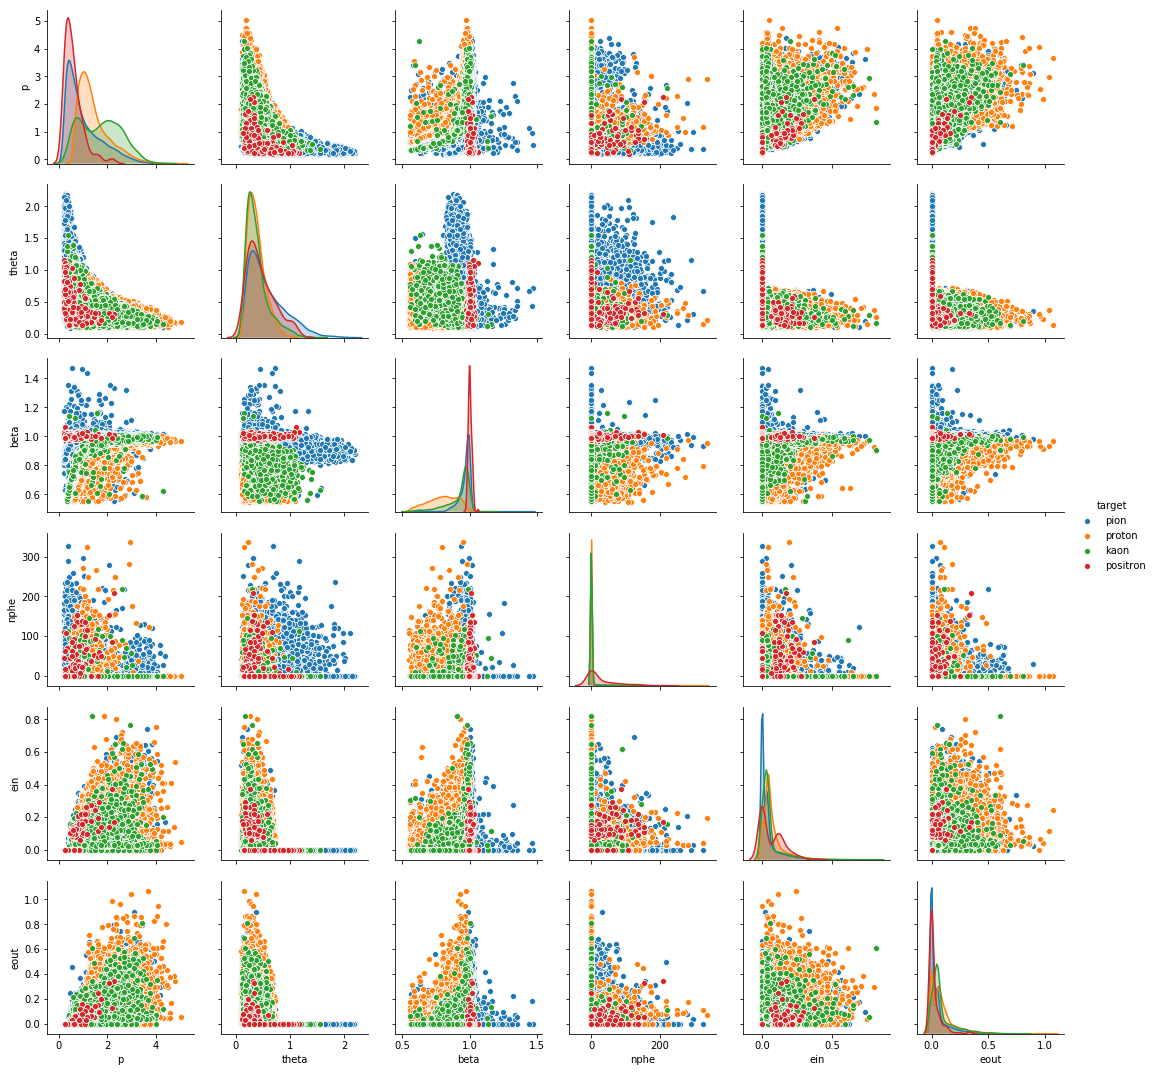

In [11]:
sns.pairplot(dfreduce,hue = 'target')

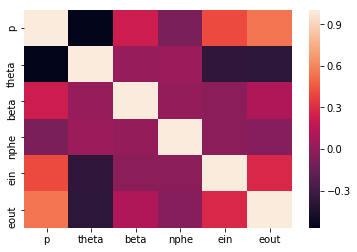

In [13]:
sns.heatmap(dfreduce.corr())

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [16]:
X = dfreduce.drop('target', axis = 1)

In [17]:
y = dfreduce['target']

In [18]:
scale = StandardScaler()

In [19]:
scale.fit(X)

C:\Users\Spencer\Anaconda3\envs\Tensorflow\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [20]:
X = scale.transform(X)

C:\Users\Spencer\Anaconda3\envs\Tensorflow\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [52]:
knn = KNeighborsClassifier(n_neighbors=10)

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [55]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

In [56]:
predictions = knn.predict(X_test)

In [57]:
knn.score(X_test, y_test)

0.9592

In [58]:
from sklearn.metrics import classification_report, confusion_matrix

In [59]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

        kaon       0.81      0.57      0.67       719
        pion       0.96      0.98      0.97      8373
    positron       0.73      0.22      0.34        50
      proton       0.97      0.99      0.98      5858

   micro avg       0.96      0.96      0.96     15000
   macro avg       0.87      0.69      0.74     15000
weighted avg       0.96      0.96      0.96     15000



In [60]:
print(confusion_matrix(y_test, predictions))

[[ 409  245    0   65]
 [  78 8178    4  113]
 [   0   39   11    0]
 [  20   48    0 5790]]


In [61]:
from sklearn.svm import SVC

In [65]:
svc = SVC(gamma='scale')

In [66]:
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [67]:
svc.score(X_test, y_test)

0.9656666666666667

In [68]:
predictions = svc.predict(X_test)

In [69]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

        kaon       0.84      0.60      0.70       719
        pion       0.96      0.98      0.97      8373
    positron       0.00      0.00      0.00        50
      proton       0.98      0.99      0.99      5858

   micro avg       0.97      0.97      0.97     15000
   macro avg       0.70      0.64      0.67     15000
weighted avg       0.96      0.97      0.96     15000



C:\Users\Spencer\Anaconda3\envs\Tensorflow\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [70]:
print(confusion_matrix(y_test, predictions))

[[ 432  239    0   48]
 [  62 8236    0   75]
 [   0   50    0    0]
 [  20   21    0 5817]]


In [71]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
rnc = RandomForestClassifier(n_estimators=50)

In [73]:
rnc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [74]:
rnc.score(X_test, y_test)

0.9696666666666667

In [76]:
predictions = rnc.predict(X_test)

In [77]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

        kaon       0.80      0.71      0.75       719
        pion       0.98      0.98      0.98      8373
    positron       0.90      0.38      0.54        50
      proton       0.98      0.99      0.99      5858

   micro avg       0.97      0.97      0.97     15000
   macro avg       0.91      0.76      0.81     15000
weighted avg       0.97      0.97      0.97     15000



In [78]:
print(confusion_matrix(y_test, predictions))

[[ 507  167    0   45]
 [  96 8206    2   69]
 [   0   31   19    0]
 [  33   12    0 5813]]


In [79]:
from sklearn.linear_model import SGDClassifier

In [85]:
df['target'] = df['id'].map({211:'pion', -11:'positron', 321:'kaon', 2212:'proton'})

In [86]:
df.head()

,id,p,theta,beta,nphe,ein,eout,target
0,211,0.780041,1.081480,0.989962,0,0.000000,0.000000,pion
1,211,0.260929,0.778892,0.902450,0,0.000000,0.000000,pion
2,2212,0.773022,0.185953,0.642428,4,0.101900,0.000000,proton
3,211,0.476997,0.445561,0.951471,0,0.000000,0.000000,pion
4,2212,2.123290,0.337332,0.908652,0,0.034379,0.049256,proton


In [87]:
df.drop('id', axis = 1, inplace=True)

In [88]:
X = df.drop('target', axis = 1)

In [89]:
y = df['target']

In [91]:
scale = StandardScaler()
scale.fit(X)
X = scale.transform(X)

C:\Users\Spencer\Anaconda3\envs\Tensorflow\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Spencer\Anaconda3\envs\Tensorflow\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [93]:
sgdc = SGDClassifier()

In [94]:
sgdc.fit(X_train, y_train)

C:\Users\Spencer\Anaconda3\envs\Tensorflow\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [95]:
sgdc.score(X_test,y_test)

0.9318346666666667

In [96]:
predictions = sgdc.predict(X_test)

In [97]:
print(classification_report(y_test, predictions))

C:\Users\Spencer\Anaconda3\envs\Tensorflow\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

        kaon       0.00      0.00      0.00     69514
        pion       0.94      0.97      0.95    842476
    positron       0.00      0.00      0.00      4558
      proton       0.92      0.99      0.96    583452

   micro avg       0.93      0.93      0.93   1500000
   macro avg       0.47      0.49      0.48   1500000
weighted avg       0.89      0.93      0.91   1500000



In [98]:
print(confusion_matrix(y_test, predictions))

[[     0  45376      0  24138]
 [     0 818165      0  24311]
 [     0   4557      0      1]
 [     0   3865      0 579587]]


In [99]:
rnc = RandomForestClassifier(n_estimators=50)
rnc.fit(X_train, y_train)
rnc.score(X_test, y_test)

0.9713613333333333